In [1]:
import os
os.environ['NUMEXPR_MAX_THREADS'] = '35'
from functions import *

import numpy as np
from plotting_beta import *
from plotting_betas import *
import matplotlib
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

tslen = 100

INFO: Using numpy backend


## Loading Data

In [2]:
data_stroke = np.load('stroke_landmark.pkl',allow_pickle=True)
data_healthy = np.load('healthy_landmark.pkl',allow_pickle=True)

len(data_stroke.keys()), len(data_healthy.keys())

(46, 84)

In [3]:
%matplotlib qt5
a = plotting_beta_landmark(data_healthy['01'], zoom=1.5)

## Resampling

In [3]:
?process_kinematic

Signature: process_kinematic(data, gamma_t)
Docstring: <no docstring>
File:      ~/U-Extend/stroke_data/stroke-shape-main/functions.py
Type:      function

In [4]:
# %%timeit
# gamma_t = np.linspace(0, 1, tslen)
# betas_resampled_stroke = process_kinematic(data_healthy, gamma_t)

In [3]:
gamma_t = np.linspace(0, 1, tslen)
betas_resampled_stroke = process_kinematic(data_stroke, gamma_t)
betas_resampled_healthy = process_kinematic(data_healthy, gamma_t)

len(betas_resampled_stroke), len(betas_resampled_healthy) 

(46, 84)

In [4]:
betas_all = betas_resampled_stroke + betas_resampled_healthy
betas_all_arr = np.array(betas_all)
betas_all_arr.shape

(130, 29, 3, 100)

In [7]:
# %matplotlib qt5
# a = plotting_beta_landmark(betas_all[70])

## Euclidean Mean

In [6]:
for i in range(130):
    if i < 46:
        offset = np.random.uniform(-1.5, 0)
    else:
        offset = np.random.uniform(0, 1.5)
    betas_all[i] += offset

In [7]:
%matplotlib qt5
colors = [(1, 0, 0)]*len(betas_resampled_stroke) + [(0, 0.5, 1)]*len(betas_resampled_healthy)
p = plotting_betas_landmark(betas_all, colors, zoom=0.75)

In [8]:
fps = 10

# Define the writer with the correct framerate
writervideo = matplotlib.animation.FFMpegWriter(fps=fps)

p.to_video("pics_videos/unregistered_all.mp4", fps=fps)

0it [00:00, ?it/s]INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x714 -pix_fmt rgba -framerate 10 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y pics_videos/unregistered_all.mp4
100it [00:39,  2.55it/s]


In [10]:
# betas_euclidean_mean = np.mean(betas_all_arr, axis=0)
# betas_euclidean_mean.shape

In [11]:
# p_euclidean = plotting_beta_landmark(betas_euclidean_mean, zoom=1.5)

In [12]:
# fps = 10

# Define the writer with the correct framerate
# writervideo = matplotlib.animation.FFMpegWriter(fps=fps)

# # Save the animation with the correct writer
# p_euclidean.to_video("pics_videos/euclidean_mean.mp4", fps=fps)

## Creating y array

In [9]:
stroke_labels = np.full(len(betas_resampled_stroke), 'Stroke')
healthy_labels = np.full(len(betas_resampled_healthy), 'Healthy')

y = np.concatenate((stroke_labels, healthy_labels))

In [8]:
?frechet

Signature: frechet(betas, t, mu_init, iterations=50, plot=True, tol=1e-05)
Docstring: <no docstring>
File:      ~/U-Extend/stroke_data/stroke-shape-main/functions.py
Type:      function

## Getting frechet mean

  0%|          | 0/10 [00:00<?, ?it/s]

INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using 

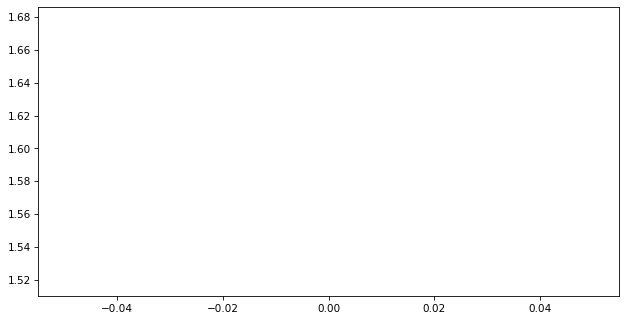

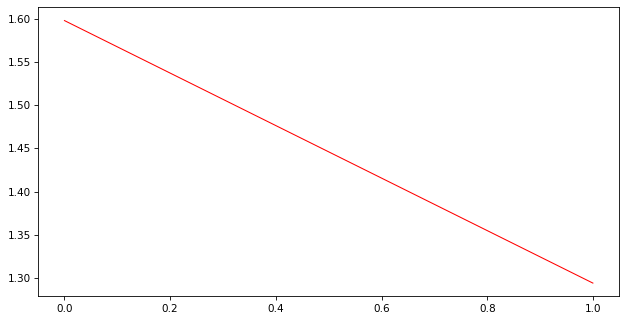

KeyboardInterrupt: 

In [10]:
%matplotlib inline
mu_init = betas_resampled_healthy[np.random.choice(range(len(betas_resampled_healthy)))]
mu_all, betas_aligned_all, gammas_all, tangent_vec_all, history_all = frechet(betas_all, gamma_t, mu_init, iterations=10)

## Plotting trajectories of a single landmark

In [12]:
def plot_traj(betas_resampled, betas_aligned, gamma_t, gammas, mu):

    fig, axs = plt.subplots(1, 3, figsize=(3*10, 6))
    
    N = len(betas_resampled)
    
    for n in range(N):
    
      axs[0].plot(gamma_t, betas_resampled[n][0,0,:])
      axs[1].plot(gamma_t, betas_aligned[n][0,0,:])
      axs[2].plot(gamma_t, gammas[n])

    axs[1].plot(gamma_t, mu[0,0,:], color='black',linewidth=4)
    
    plt.tight_layout()

## Saving and loading

In [24]:
import pickle
import time
import random

def saving(betas_aligned, mu, gammas, tangent_vecs, filename):
    ts_length = mu_all.shape[-1]
    random_timestamp = int(time.time() + random.randint(0, 1000))
    
    with open('{}/betas_aligned_{}_{}.pkl'.format(filename, ts_length, random_timestamp), 'wb') as f:
        pickle.dump(betas_aligned, f)
    with open('{}/mu_{}_{}.pkl'.format(filename, ts_length, random_timestamp), 'wb') as f:
        pickle.dump(mu, f)
    with open('{}/gammas_{}_{}.pkl'.format(filename, ts_length, random_timestamp), 'wb') as f:
        pickle.dump(gammas, f)
    with open('{}/tangent_vecs_{}_{}.pkl'.format(filename, ts_length, random_timestamp), 'wb') as f:
        pickle.dump(tangent_vecs, f)


In [25]:
saving(betas_aligned_all, mu_all, gammas_all, tangent_vec_all, 'all_aligned')

In [21]:
#loading
def loading(filename):
    with open('{}/betas_aligned.pkl'.format(filename), 'rb') as f:
        betas_aligned = pickle.load(f)
    with open('{}/mu.pkl'.format(filename), 'rb') as f:
        mu = pickle.load(f)
    with open('{}/tangent_vecs.pkl'.format(filename), 'rb') as f:
        tangent_vec_all = pickle.load(f)
    with open('{}/gammas.pkl'.format(filename), 'rb') as f:
        gammas_all = pickle.load(f)
    return betas_aligned, mu, tangent_vec_all, gammas_all

In [47]:
betas_aligned_all, mu_all, tangent_vec_all, gammas_all = loading('all_aligned')
len(betas_aligned_all)

130

In [20]:
%matplotlib inline
# plot_traj(betas_all, betas_aligned_all, gamma_t, gammas_all, mu_all)

In [ ]:
# %matplotlib qt5
# colors = [(1, 0, 0)]*len(betas_resampled_stroke) + [(0, 0.5, 1)]*len(betas_resampled_healthy)
# p = plotting_betas_landmark(betas_aligned_all, colors)

In [ ]:
# fps = 10
    
# # Define the writer with the correct framerate
# writervideo = matplotlib.animation.FFMpegWriter(fps=fps)
# p.to_video("pics_videos/registation_aligned_all.mp4", fps=fps)

In [ ]:
# def save_skeleton(p, filename):
#     fps = 10
    
#     # Define the writer with the correct framerate
#     writervideo = matplotlib.animation.FFMpegWriter(fps=fps)
    
#     # Save the animation with the correct writer
#     p.to_video(filename, fps=fps)

In [27]:
%matplotlib qt5
p_mu_all = plotting_beta_landmark(mu_all)

In [ ]:
# from plot_frames import *

# output_image_foldername = 'pics_videos/kendall_mean'
# input_video_filename = 'pics_videos/kendall_mean.mp4'

# plot_frames(input_video_filename, output_image_foldername)

In [ ]:
# save_skeleton(p_mu_all, "pics_videos/kendall_mean.mp4")

## Functional PCA and skeleton plotting

In [ ]:
%matplotlib qt5
from tqdm.notebook import tqdm

K = 29
M = 3
T = 200
R = 20


tangent_flat = tangent_vec_all.reshape((K*M*T, len(betas_aligned_all)))
U, sigma, V_t = np.linalg.svd(tangent_flat)
vec_reconstructed = U[:,0:R].reshape((K, M, T, R))

lambdas = (sigma**2)/(len(betas_aligned_all)-1)

betas_hat_t = []


scales = [-2, 0, 2]
plist = []

for r in tqdm(range(20)):
    for s_id, scale in enumerate(scales):

      sigma_scaled = scale*np.sqrt(lambdas[r])  
      beta_t_hat = np.zeros(betas_aligned_all[0].shape)


      for tt in range(T):
        beta_t_hat[:,:,tt] = exp(mu_all[:,:,tt], sigma_scaled*vec_reconstructed[:,:,tt,r])

      betas_hat_t.append(beta_t_hat)

    p_all = plotting_betas_landmark([betas_hat_t[-3], betas_hat_t[-2], betas_hat_t[-1]], colors=[(1, 0, 0), (0, 0, 0), (0, 0.5, 1)])
    plist.append(p_all)


## Saving Skeleton

In [ ]:
for r, p in enumerate(plist):
    fps = 10

    # Define the writer with the correct framerate
    writervideo = matplotlib.animation.FFMpegWriter(fps=fps)

    # Save the animation with the correct writer
    p.to_video("pc_videos_so/pcmode-202({}).mp4".format(r+1), fps=fps)

## Getting plot of variance explained

In [ ]:
%matplotlib inline
var_exp = lambdas/lambdas.sum()
plt.plot(var_exp)

In [ ]:
plt.scatter(range(40), np.cumsum(var_exp[:40]*100))

In [ ]:
from collections import Counter
Counter(y)

## Boxplot of pc_cords

In [ ]:
# y = (pc_demo_df['Cohort']+pc_demo_df['LesionLeft'].astype(str)).values

In [ ]:
y

In [ ]:
# y = (pc_demo_df['Cohort']+pc_demo_df['LesionLeft'].astype(str)).values
    
# df = pd.DataFrame({'pc': x, 'cohort': y})
    

In [ ]:
df

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import itertools

pc_cords = np.diag(sigma[0:R])@V_t[0:R,:]


combined_demo_df = pd.read_csv('new_demographic.csv') 

pcdf = pd.DataFrame(np.transpose(pc_cords[:, :]))
pcdf.columns = [i+1 for i in range(0, 20)]

pc_demo_df = pd.concat([pcdf, combined_demo_df], axis=1)


#pc_cords = pc_demo_df.iloc[:,0:20].values


#pc_demo_df

for r in tqdm(range(R)):

    x = np.transpose(pc_cords[r, :])
    #y = y.flatten()
    y = (pc_demo_df['Cohort']+pc_demo_df['LesionLeft'].astype(str)).values
    
    df = pd.DataFrame({'pc': x, 'cohort': y})
    df['cohort'] = pd.Categorical(df['cohort'])
    
    
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(x='cohort', y='pc', data=df, palette=['tab:red', 'tab:blue'])
    
    
    plt.xlabel('Cohort')
    plt.ylabel('pc loading')

    cohorts = df['cohort'].unique()

    p_vals = []

    for c1, c2 in itertools.combinations(cohorts, 2):
            
            group1 = df[df['cohort'] == c1]['pc']
            group2 = df[df['cohort'] == c2]['pc']
            t_stat, p_value = ttest_ind(group1, group2)
            p_vals.append(round(p_value, 5))
    
    plt.title(str(r+1) + " " + str(p_vals))
    #plt.text(0.5, max(df['pc']) * 0.95, f'p-value = {str(p_vals):.3e}', ha='center', va='bottom', fontsize=12, color='black')

    
    #plt.savefig("pc_boxplots/pcmode({})".format(r+1), dpi=300)


In [ ]:
df['cohort'].unique()

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.metrics import f1_score

# f1_scores = []

# for t in tqdm(range(1000)):

#     # Assuming X is your feature array of shape (20, 130) and needs transposing
#     X = pc_cords.T  # Transpose to make it (130, 20)
    
#     # y should be an array of length 130 containing your labels (46 stroke, 84 healthy)
#     ylabels = [1]*46 + [0]*84  # Assuming 1 for stroke, 0 for healthy
    
#     # Split the data into training and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)
    
#     # Standardize the features
#     # scaler = StandardScaler()
#     # X_train = scaler.fit_transform(X_train)
#     # X_test = scaler.transform(X_test)
    
#     # Create and train the SVM classifier
#     svm_model = SVC(kernel='linear')  # Using a linear kernel
#     svm_model.fit(X_train, y_train)
    
#     # Predicting the test set results
#     y_pred = svm_model.predict(X_test)
#     f1_scores.append(f1_score(y_test, y_pred))

# print(np.percentile(f1_scores, 5), np.percentile(f1_scores, 50), np.percentile(f1_scores, 95))

In [ ]:
# with open('pc_cords_kin_aligned.pkl', 'wb') as f:
#     pickle.dump(pc_cords, f)

## DTW_Distance and Kendall Distance

In [ ]:
def log_dist(mu, beta):

    tangent_vec = np.zeros(mu.shape)
    
    for tt in range(mu.shape[2]):
        tangent_vec[:,:,tt] = log(mu[:,:,tt], beta[:,:,tt]) # make sure to shoot a vector to the aligned betas

    return np.linalg.norm(tangent_vec)


In [ ]:
from tslearn import metrics
from tqdm.notebook import tqdm
import numpy as np
from joblib import Parallel, delayed

def compute_distances(i):
    dist_dtw_row = np.zeros(N)
    dist_kendall_row = np.zeros(N)
    dist_pairwise_kendall_row = np.zeros(N)

    beta1 = betas_all[i]
    beta1_aligned = betas_aligned_all[i]
    t = np.linspace(0, 1, 100)
    
    for j in tqdm(range(N)):

        beta2 = betas_all[j]
        beta2_aligned = betas_aligned_all[j]
        
        beta_aligned, gamma_inv, history = temporal_rotation_align(beta1, beta2, t, iterations=10)
        
        dist_dtw_row[j] = metrics.dtw(beta1.reshape(100, 87), beta2.reshape(100, 87))
        dist_kendall_row[j] = log_dist(beta1_aligned, beta2_aligned)
        dist_pairwise_kendall_row[j] = log_dist(beta1, beta_aligned)
    
    return dist_dtw_row, dist_kendall_row, dist_pairwise_kendall_row

N = len(betas_all)
dist_dtw = np.zeros((N, N))
dist_kendall = np.zeros((N, N))
dist_pairwise_kendall = np.zeros((N, N))

results = Parallel(n_jobs=-1)(delayed(compute_distances)(i) for i in tqdm(range(N)))

for i in range(N):
    dist_dtw[i, :] = results[i][0]
    dist_kendall[i, :] = results[i][1]
    dist_pairwise_kendall[i, :] = results[i][2]

In [ ]:
with open('raz_dist.pkl','rb') as f:
    raz_aligned = pickle.load(f)

In [ ]:
%matplotlib inline

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.heatmap(dist_dtw, ax = axs[0], cmap='bwr')
axs[0].set_title('DTW Distance')

sns.heatmap(raz_aligned, ax = axs[1], cmap='bwr')
axs[1].set_title('Raz Align Distance')

sns.heatmap(dist_kendall, ax = axs[2], cmap='bwr')
axs[2].set_title('Dist Kendall (Registered to mean)')

# sns.heatmap(dist_pairwise_kendall, ax = axs[3], cmap='bwr')
# axs[3].set_title('Dist Pairwise Kendall')

plt.savefig('pics_videos/pairwise_dist.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.heatmap(dist_pairwise_kendall, cmap='bwr')

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

embedding = MDS(n_components=2, normalized_stress='auto', dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dist_kendall)
X_transformed.shape

In [ ]:
dist_df = pd.DataFrame(X_transformed, columns=['Dim1','Dim2'])
dist_df['Cohort'] = y
dist_df

In [ ]:
%matplotlib inline
plt.figure(figsize=(7, 7))
scatter_plot = sns.scatterplot(data=dist_df, x='Dim1', y='Dim2', hue='Cohort')

# Annotate each point with its index
for i in range(dist_df.shape[0]):
    plt.annotate(i, (dist_df['Dim1'][i], dist_df['Dim2'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Multi Dimensional Scaling Embedding')
plt.savefig('pics_videos/mds_dist_kendall.png', dpi=300, bbox_inches='tight')

In [ ]:
len(betas_all), len(betas_aligned_all)

# 14, 10, 36, 
# 42, 34, 2

In [ ]:
%matplotlib qt5
# p = plotting_beta_landmark(betas_all[14])

pg = plotting_betas_landmark([betas_aligned_all[10], betas_aligned_all[14] + 0.15, betas_aligned_all[36] - 0.15])

In [ ]:
fps = 10
    
# Define the writer with the correct framerate
writervideo = matplotlib.animation.FFMpegWriter(fps=fps)
# Save the animation with the correct writer
pg.to_video('pics_videos/mds_good.mp4', fps=fps)

In [ ]:
pb = plotting_betas_landmark([betas_aligned_all[2], betas_aligned_all[34] + 0.15, betas_aligned_all[42] - 0.15])

In [ ]:
pb.to_video('pics_videos/mds_bad.mp4', fps=fps)

In [ ]:
# p.to_video('pics_videos/original38.mp4',fps=10)
# p2.to_video('pics_videos/aligned38.mp4',fps=10)

In [ ]:
# with open('dist_dtw.pkl', 'wb') as f:
#     pickle.dump(dist_dtw, f)

# with open('dist_kendall.pkl', 'wb') as f:
#     pickle.dump(dist_kendall, f)

## Loading and combining pc and demographic data

In [ ]:
combined_demo_df = pd.read_csv('new_demographic.csv') 

pcdf = pd.DataFrame(np.transpose(pc_cords[:, :]))
pcdf.columns = [i+1 for i in range(0, 20)]

pc_demo_df = pd.concat([pcdf, combined_demo_df], axis=1)
pc_demo_df

## Covariance

In [ ]:
y2 = corr_df[]

In [ ]:
%matplotlib inline
pc_demo_df = pd.concat([pcdf, combined_demo_df], axis=1)
pc_demo_df = pc_demo_df.drop(columns=['PID'])

corr_df = pc_demo_df.select_dtypes(include='number').corr().iloc[20:,:20]

plt.figure(figsize = (17,10))

dataplot = sns.heatmap(corr_df, cmap=sns.diverging_palette(0, 255, sep=77, as_cmap=True), 
                      annot=True, vmin=-1, vmax=1, xticklabels = True)

plt.savefig('pics_videos/cross_crrorelation.png', dpi=300)

In [ ]:
corr_df

In [ ]:
cc = pc_demo_df.select_dtypes(include='number').corr().iloc[20:,20:]

plt.figure(figsize = (17,10))

dataplot = sns.heatmap(cc, cmap=sns.diverging_palette(0, 255, sep=77, as_cmap=True), 
                      annot=True, vmin=-1, vmax=1, xticklabels = True)

plt.savefig('pics_videos/cross_crrorelation_y.png', dpi=300)

## CCA

In [ ]:
# %matplotlib inline
# K = 29
# M = 3
# T = 100


# tangent_flat = tangent_vec_all.reshape((K*M*T, len(betas_aligned_all))).T

# tangent_flat_stroke = tangent_flat[combined_demo_df['Cohort'] == 'Stroke']
# combined_stroke = combined_demo_df[combined_demo_df['Cohort'] == 'Stroke']

# code, unique = pd.factorize(combined_demo_df['Cohort'])
# combined_demo_df['Cohort_binary'] = code

# y = combined_stroke[['LesionLeft','FAC','POMA','TIS']]

# y = pd.DataFrame(np.random.uniform(size=y.shape))
# y.columns = ['LesionLeft','FAC','POMA','TIS']

# tangent_df = pd.DataFrame(tangent_flat_stroke)
# X_df = pd.concat([tangent_df, y], axis=1)

# X_df
# from sklearn.cross_decomposition import CCA
# rank = 4
# cca = CCA(n_components=rank)
# cca.fit(tangent_df, y)

# X_t, y_t = cca.transform(tangent_df, y)
# plt.scatter(X_t[:,0], y_t[:,0])

In [ ]:
# %matplotlib inline
# from scipy import stats
# from sklearn.cross_decomposition import CCA
# from sklearn.model_selection import train_test_split

# corr_trial = []
# X_weights = []
# Y_weights = []
# p_values = []

# X_cols = [i for i in range(8700)]
# # Y_cols = ['LesionLeft','FAC','POMA','TIS']
# Y_cols = ['TIS']

# for i in range(100):

#     X_train, X_test = train_test_split(X_df, test_size=0.3, shuffle=True)

#     x_tr = X_train[X_cols]
#     y_tr = X_train[Y_cols]

#     x_tst = X_test[X_cols]
#     y_tst = X_test[Y_cols]

#     rank = 1

#     cca = CCA(n_components=rank)
#     cca.fit(x_tr, y_tr)
    
#     X_train_r, Y_train_r = cca.transform(x_tr, y_tr)
#     X_test_r, Y_test_r = cca.transform(x_tst, y_tst)

#     corrs = []


#     for r in range(rank):

#         x = X_test_r[:,r]
#         y = Y_test_r[:,r]
        
#         r1 = list(cca.x_loadings_[:,r])
#         #r1.append(r)
        
#         r2 = list(cca.y_loadings_[:,r])
#         #r2.append(r)

#         #rho = round(np.corrcoef(x, y)[0,1], 3)
#         rho, _ = stats.pearsonr(x, y)
#         rho = round(rho, 3)
        
#         X_weights.append(r1)
#         Y_weights.append(r2)
        
#         corr_trial.append([rho, r])

#         # plt.figure()

#         # plt.scatter(x, y)
#         # plt.figure()
#         # plt.title('{}'.format(rho))
#         # plt.plot(r2)

    
# rho_df = pd.DataFrame(corr_trial)
# xweights_df = pd.DataFrame(X_weights)
# yweights_df = pd.DataFrame(Y_weights)
# yweights_df.columns = Y_cols

In [ ]:
# rho_df

In [ ]:
# print(np.percentile(rho_df.loc[:,0], [5, 50, 95]))

In [ ]:
# trial = 0
# newr1 = xweights_df.iloc[trial,:].values.reshape(29, 3, 100)
# print(yweights_df)

# mu = np.zeros((newr1.shape))
# epsilon = 1
# for tt in range(newr1.shape[2]):
#     mu[:,:,tt] = exp(mu_all[:,:,tt], epsilon*newr1[:,:,tt])

# %matplotlib qt5
# p_mu = plotting_beta_landmark(mu)

In [ ]:
#p_mu.to_video('pics_videos/regression_weights_FAC.mp4')

In [ ]:
# p_mu.to_image('pics_videos/regression_weights_TIS.png')

## Unaligned FPCA

In [115]:
betas_all_arr = np.array(betas_all)
betas_all_arr.shape

(130, 29, 3, 200)

In [116]:
K = 29
M = 3
T = tslen
R = 20

# unaligned
tangent_vec_all_unaligned = np.transpose(betas_all_arr, (1, 2, 3, 0))
print(tangent_vec_all_unaligned.shape)

tangent_flat_unaligned = tangent_vec_all_unaligned.reshape(K*M*T, len(betas_all))
U_unaligned, sigma_unaligned, V_t_unaligned = np.linalg.svd(tangent_flat_unaligned, full_matrices=False)
vec_reconstructed_unaligned = U_unaligned[:,0:R].reshape((K, M, T, R))

lambdas_unaligned = (sigma_unaligned**2)/(len(betas_all)-1)

(29, 3, 200, 130)


In [117]:
mu_unaligned = np.mean(betas_all_arr, axis=0)
mu_unaligned.shape

(29, 3, 200)

In [118]:
%matplotlib qt5
p = plotting_beta_landmark(mu_unaligned)

In [120]:
%matplotlib qt5
from tqdm.notebook import tqdm

betas_hat_t_unaligned = []

scales = [-2, 0, 2]
plist_unaligned = []

for r in tqdm(range(2)):
    for s_id, scale in enumerate(scales):

      sigma_scaled_unaligned = scale*np.sqrt(lambdas_unaligned[r])  
      beta_t_hat_unaligned = np.zeros(betas_all[0].shape)

      for tt in range(T):
        beta_t_hat_unaligned[:,:,tt] = exp(mu_unaligned[:,:,tt], sigma_scaled_unaligned*vec_reconstructed_unaligned[:,:,tt,r])

      betas_hat_t_unaligned.append(beta_t_hat_unaligned)

    p_all_unaligned = plotting_betas_landmark([betas_hat_t_unaligned[-3], betas_hat_t_unaligned[-2], betas_hat_t_unaligned[-1]], colors=[(1, 0, 0), (0, 0, 0), (0, 0.5, 1)])
    plist_unaligned.append(p_all_unaligned)

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# for r, p in enumerate(plist_unaligned):
#     fps = 10

#     # Define the writer with the correct framerate
#     writervideo = matplotlib.animation.FFMpegWriter(fps=fps)

#     # Save the animation with the correct writer
#     p.to_video("pc_video_unaligned/pcmode-202({}).mp4".format(r+1), fps=fps)

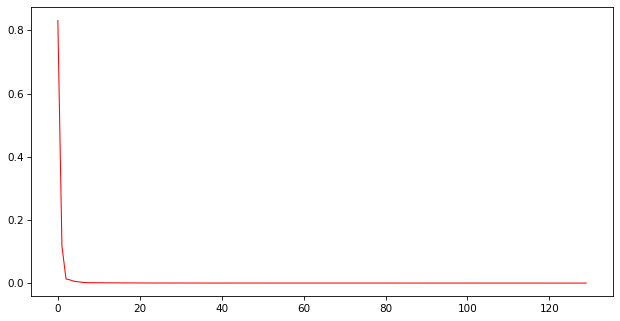

In [121]:
%matplotlib inline
var_exp_un = lambdas_unaligned/lambdas_unaligned.sum()
plt.plot(var_exp_un)

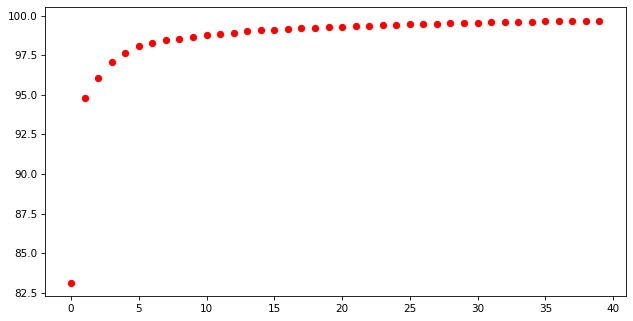

In [122]:
plt.scatter(range(40), np.cumsum(var_exp_un[:40]*100))

In [123]:
pc_cords_unaligned = np.diag(sigma_unaligned[0:R])@V_t_unaligned[0:R,:]
pc_cords_unaligned.shape

(20, 130)

  0%|          | 0/20 [00:00<?, ?it/s]

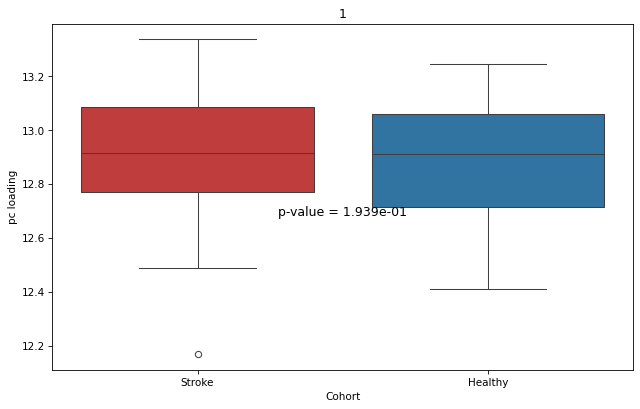

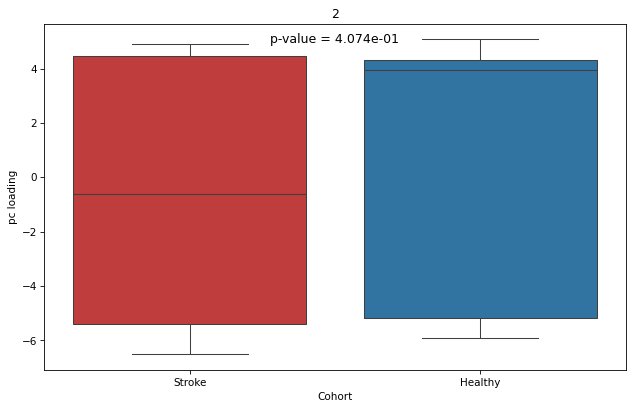

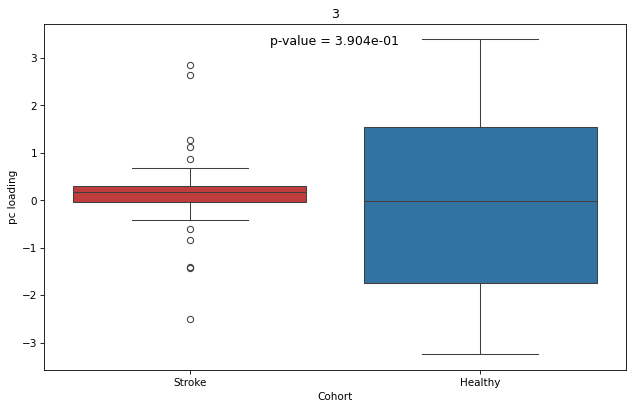

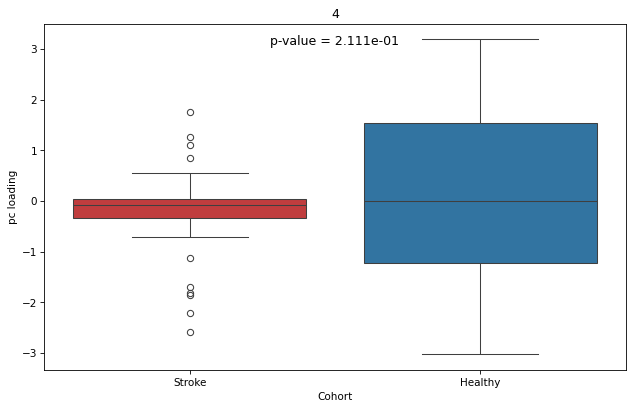

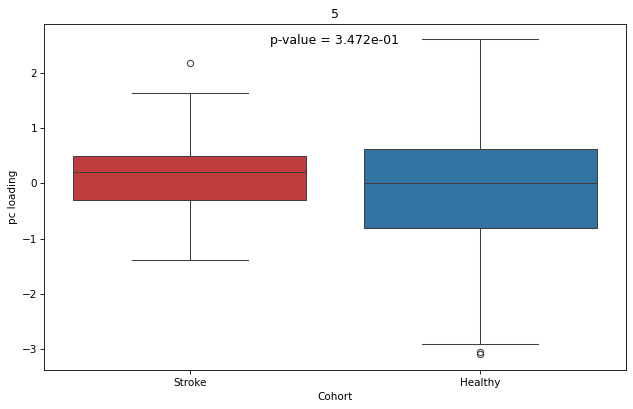

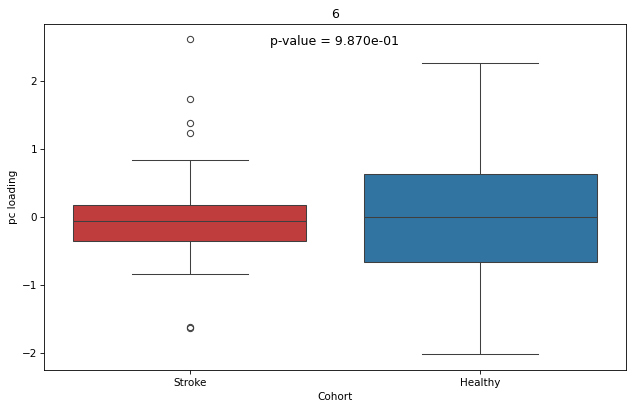

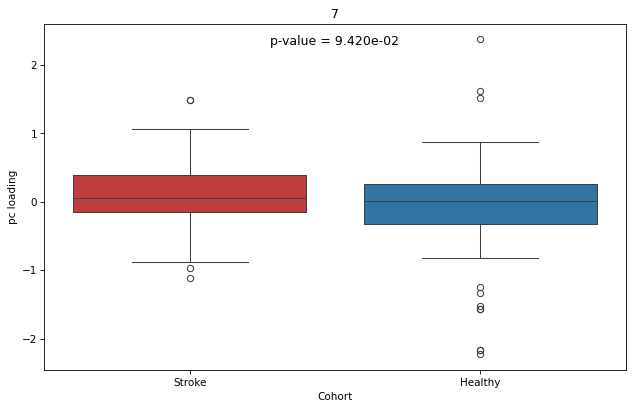

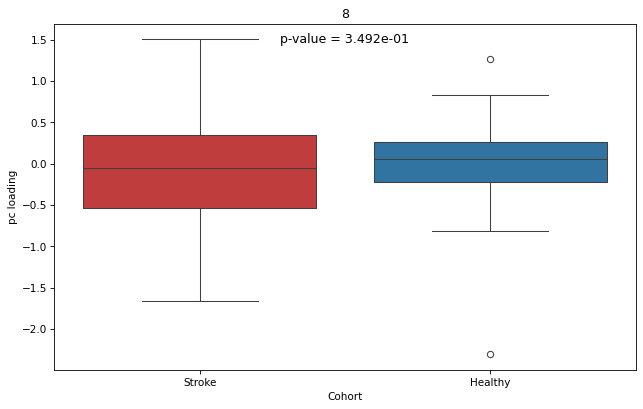

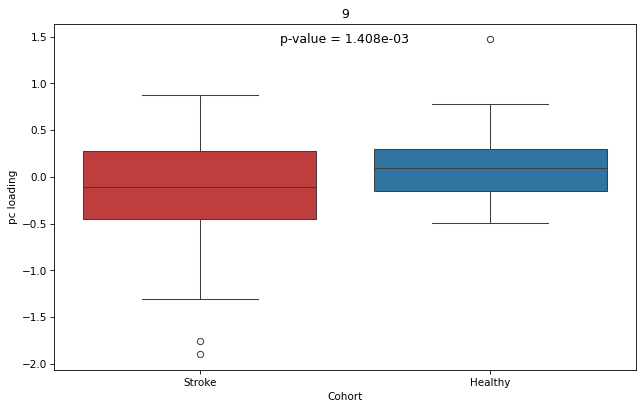

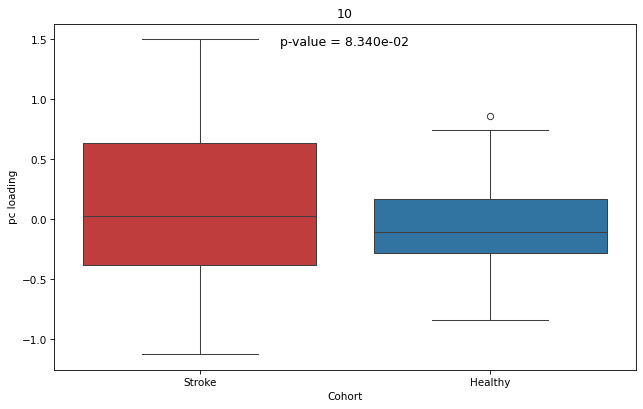

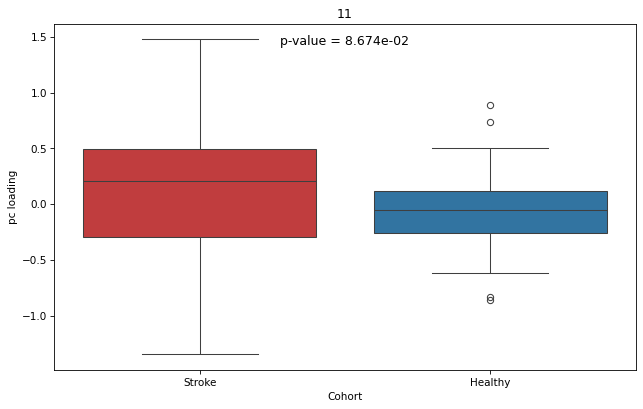

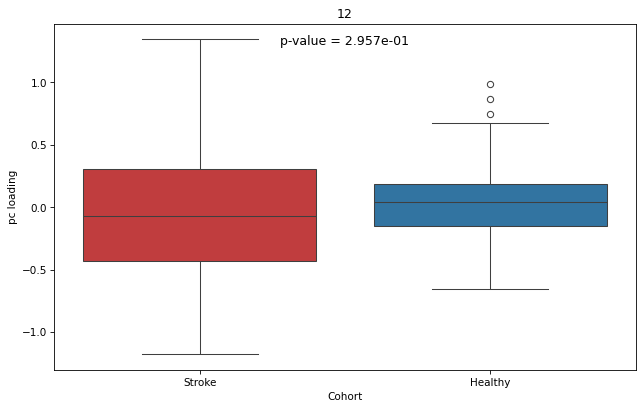

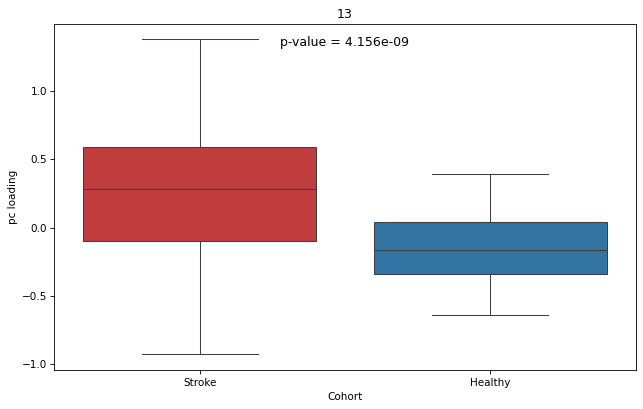

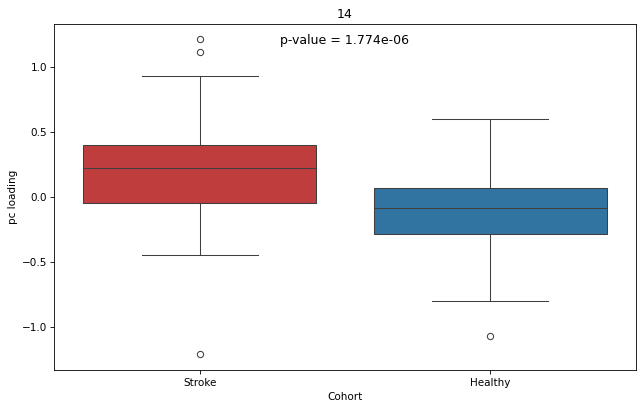

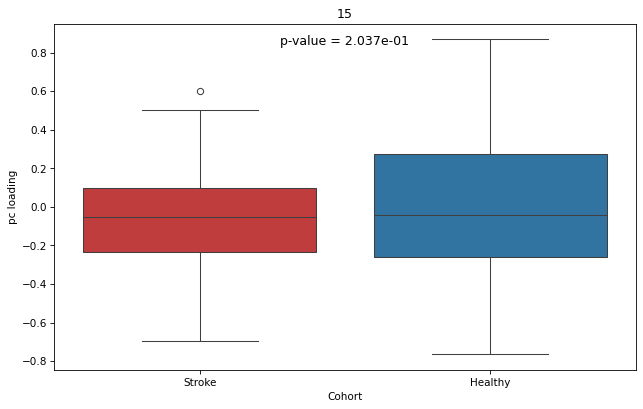

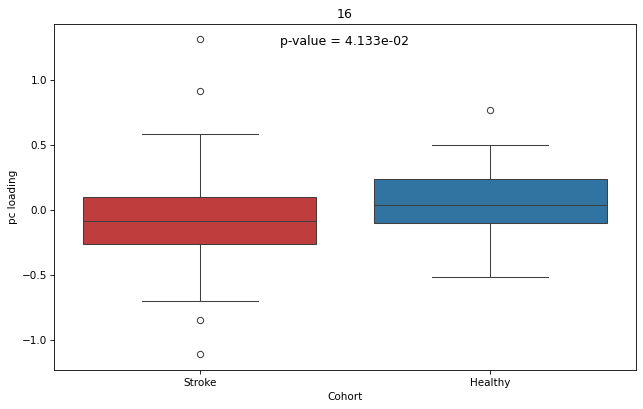

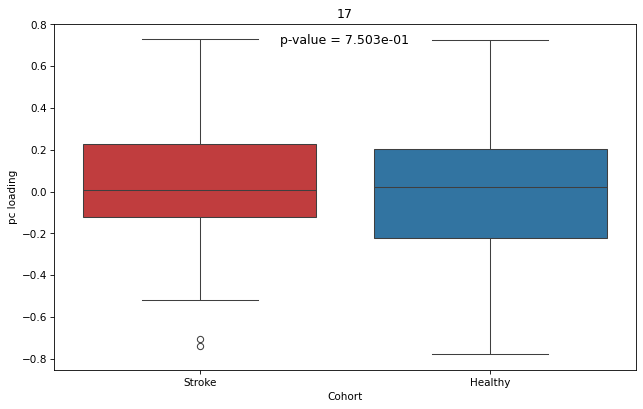

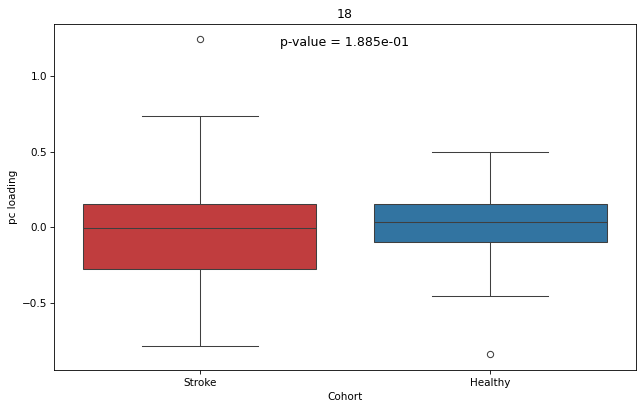

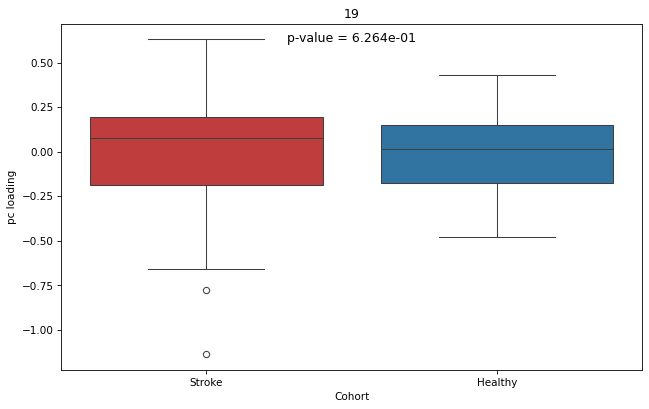

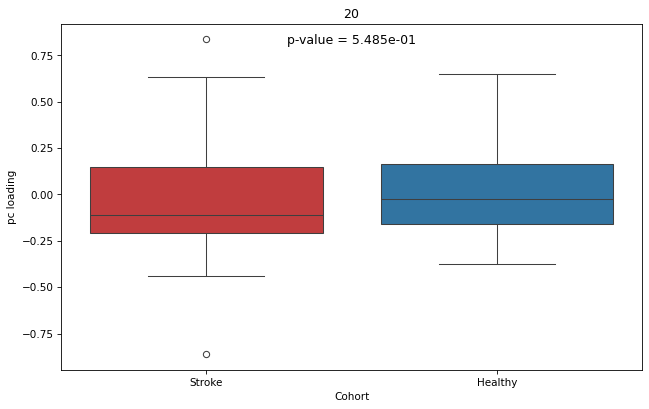

In [124]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


for r in tqdm(range(R)):

    x = pc_cords_unaligned[r, :]
    y = y.flatten()
    
    df = pd.DataFrame({'pc': x, 'cohort': y})
    
    
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(x='cohort', y='pc', data=df, palette=['tab:red', 'tab:blue'])
    
    
    plt.xlabel('Cohort')
    plt.ylabel('pc loading')
    
    group1 = df[df['cohort'] == df['cohort'].unique()[0]]['pc']
    group2 = df[df['cohort'] == df['cohort'].unique()[1]]['pc']
    t_stat, p_value = ttest_ind(group1, group2)
    
    plt.title(r+1)
    plt.text(0.5, max(df['pc']) * 0.95, f'p-value = {p_value:.3e}', ha='center', va='bottom', fontsize=12, color='black')
    
    #plt.savefig("pc_boxplots/pcmode({})".format(r+1), dpi=300)


In [136]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score

f1_scores = []

for t in tqdm(range(1000)):

    # Assuming X is your feature array of shape (20, 130) and needs transposing
    X = pc_cords_unaligned.T  # Transpose to make it (130, 20)
    
    # y should be an array of length 130 containing your labels (46 stroke, 84 healthy)
    ylabels = [1]*46 + [0]*84  # Assuming 1 for stroke, 0 for healthy
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)
    
    # Standardize the features
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)
    
    # Create and train the SVM classifier
    svm_model = SVC(kernel='linear',class_weight='balanced')
    svm_model.fit(X_train, y_train)
    
    # Predicting the test set results
    y_pred = svm_model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

print(np.percentile(f1_scores, 5), np.percentile(f1_scores, 50), np.percentile(f1_scores, 95))

  0%|          | 0/1000 [00:00<?, ?it/s]

0.631578947368421 0.7857142857142857 0.8888888888888888


In [ ]:
# with open('pc_cords_kin_unaligned.pkl', 'wb') as f:
#     pickle.dump(pc_cords_unaligned, f)

### Reconstruction

In [126]:
R = 20
# fullpc_cords_unaligned = np.diag(sigma_unaligned[0:R])@V_t_unaligned[0:R,:]

# reconstruction
V_t_pinv = np.linalg.pinv(V_t_unaligned[0:R,:])
sigma_unaligned_recon =  np.diag(pc_cords_unaligned @ V_t_pinv)

reconstructed_flat = U_unaligned[:,0:R] @ np.diag(sigma_unaligned_recon) @ V_t_unaligned[0:R,:]
recon_unaligned = reconstructed_flat.reshape(K, M, T, len(betas_all))

print(reconstructed_flat.shape, tangent_vec_all_unaligned.shape, recon_unaligned.shape)

(17400, 130) (29, 3, 200, 130) (29, 3, 200, 130)


In [127]:
%matplotlib qt5
porig = plotting_beta_landmark(tangent_vec_all_unaligned[:,:,:,38])

In [128]:
%matplotlib qt5
precon = plotting_beta_landmark(recon_unaligned[:,:,:,38])